In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

In [33]:
#Extracting the Flipkart data 


data1 = pd.read_csv(r'C:\Users\shaik mahaboob basha\Internship FlipRobo\Flipkart_Ratings_Data.csv')
data1

,Unnamed: 0,Product_Review,Ratings,Product_Name
0,0,Good Laptop....Quality of build is very nice a...,4,Laptops
1,1,Basically guys the first thing u have to know ...,5,Laptops
2,2,IDK much abt this lappy coz I buyed this for m...,5,Laptops
3,3,Laptop is good in its range\nBut just one poin...,4,Laptops
4,4,Best product in less prize I buy this pdt in s...,4,Laptops
...,...,...,...,...
2499,2499,Everything great as expected. Very satisfied t...,5,Router
2500,2500,Just fantastic.. CLOSE YOUR EYES AND GO FOR IT,5,Router
2501,2501,"Excellent :- router,range, stability of signal...",5,Router
2502,2502,Range- 3 floor easily. approx 40m. speed 7mbps...,5,Router


In [34]:
#Extracting the Amazon data 


data2 = pd.read_csv(r'C:\Users\shaik mahaboob basha\Internship FlipRobo\Amazon_Ratings_Data.csv')
data2

,Unnamed: 0,Product_Review,Ratings,Product_Name
0,0,Very slow and not good 8gb ram according speed...,4.0,Laptops
1,1,Really hate the product. Its wastage of money....,1.0,Laptops
2,2,The Product Worth it,5.0,Laptops
3,3,Please don't buy this laptop. The screen keep...,1.0,Laptops
4,4,This is a review after more than 6 months of u...,2.0,Laptops
...,...,...,...,...
8745,8745,Durability: Good Built Quality. I had thought ...,5.0,Router
8746,8746,TP-Link makes some reliable routers and Archer...,5.0,Router
8747,8747,I started using this router from 10th May'19. ...,5.0,Router
8748,8748,This is the worst product... I have bought it ...,1.0,Router


In [35]:
#Combining all dataframes into a single dataframe
df=pd.concat([data1,data2],ignore_index=True)
df

,Unnamed: 0,Product_Review,Ratings,Product_Name
0,0,Good Laptop....Quality of build is very nice a...,4.0,Laptops
1,1,Basically guys the first thing u have to know ...,5.0,Laptops
2,2,IDK much abt this lappy coz I buyed this for m...,5.0,Laptops
3,3,Laptop is good in its range\nBut just one poin...,4.0,Laptops
4,4,Best product in less prize I buy this pdt in s...,4.0,Laptops
...,...,...,...,...
11249,8745,Durability: Good Built Quality. I had thought ...,5.0,Router
11250,8746,TP-Link makes some reliable routers and Archer...,5.0,Router
11251,8747,I started using this router from 10th May'19. ...,5.0,Router
11252,8748,This is the worst product... I have bought it ...,1.0,Router


In [36]:
#Checking the Unique Values

df['Product_Name'].unique()

array(['Laptops', 'Phones', 'Headphones', 'Smart Watches',
       'Professional Camera', 'Printers', 'Monitors', 'Home Theater',
       'Router'], dtype=object)

In [37]:
#Checking the Unique Values

df.Ratings.unique()

array([4., 5., 3., 1., 2.])

In [38]:
Rating_count = df['Ratings'].value_counts(normalize=True)
Rating_count

5.0    0.448640
1.0    0.226320
4.0    0.215923
3.0    0.067443
2.0    0.041674
Name: Ratings, dtype: float64

In [39]:
#Checking Null Values

df.isnull().values.any()

True

In [40]:
#Removing All NaN From the Dataset For Reducing the Confusion
df. dropna()

,Unnamed: 0,Product_Review,Ratings,Product_Name
0,0,Good Laptop....Quality of build is very nice a...,4.0,Laptops
1,1,Basically guys the first thing u have to know ...,5.0,Laptops
2,2,IDK much abt this lappy coz I buyed this for m...,5.0,Laptops
3,3,Laptop is good in its range\nBut just one poin...,4.0,Laptops
4,4,Best product in less prize I buy this pdt in s...,4.0,Laptops
...,...,...,...,...
11249,8745,Durability: Good Built Quality. I had thought ...,5.0,Router
11250,8746,TP-Link makes some reliable routers and Archer...,5.0,Router
11251,8747,I started using this router from 10th May'19. ...,5.0,Router
11252,8748,This is the worst product... I have bought it ...,1.0,Router


In [41]:
#Checking the columns
df.columns

Index(['Unnamed: 0', 'Product_Review', 'Ratings', 'Product_Name'], dtype='object')

In [42]:
#dataset having extra columns - remove


df.drop(columns=['Unnamed: 0'],axis=1, inplace = True)


In [43]:
df

,Product_Review,Ratings,Product_Name
0,Good Laptop....Quality of build is very nice a...,4.0,Laptops
1,Basically guys the first thing u have to know ...,5.0,Laptops
2,IDK much abt this lappy coz I buyed this for m...,5.0,Laptops
3,Laptop is good in its range\nBut just one poin...,4.0,Laptops
4,Best product in less prize I buy this pdt in s...,4.0,Laptops
...,...,...,...
11249,Durability: Good Built Quality. I had thought ...,5.0,Router
11250,TP-Link makes some reliable routers and Archer...,5.0,Router
11251,I started using this router from 10th May'19. ...,5.0,Router
11252,This is the worst product... I have bought it ...,1.0,Router


In [44]:
print ('Shape => ',df.shape)

Shape =>  (11254, 3)


In [45]:
#New Columns for length of message

df['Length'] = df.Product_Review.str.len()
df

,Product_Review,Ratings,Product_Name,Length
0,Good Laptop....Quality of build is very nice a...,4.0,Laptops,240.0
1,Basically guys the first thing u have to know ...,5.0,Laptops,500.0
2,IDK much abt this lappy coz I buyed this for m...,5.0,Laptops,294.0
3,Laptop is good in its range\nBut just one poin...,4.0,Laptops,142.0
4,Best product in less prize I buy this pdt in s...,4.0,Laptops,119.0
...,...,...,...,...
11249,Durability: Good Built Quality. I had thought ...,5.0,Router,793.0
11250,TP-Link makes some reliable routers and Archer...,5.0,Router,565.0
11251,I started using this router from 10th May'19. ...,5.0,Router,1122.0
11252,This is the worst product... I have bought it ...,1.0,Router,393.0


In [46]:
#Convert all messages to lower case

df['Product_Review'] = df['Product_Review'].str.lower()
df

,Product_Review,Ratings,Product_Name,Length
0,good laptop....quality of build is very nice a...,4.0,Laptops,240.0
1,basically guys the first thing u have to know ...,5.0,Laptops,500.0
2,idk much abt this lappy coz i buyed this for m...,5.0,Laptops,294.0
3,laptop is good in its range\nbut just one poin...,4.0,Laptops,142.0
4,best product in less prize i buy this pdt in s...,4.0,Laptops,119.0
...,...,...,...,...
11249,durability: good built quality. i had thought ...,5.0,Router,793.0
11250,tp-link makes some reliable routers and archer...,5.0,Router,565.0
11251,i started using this router from 10th may'19. ...,5.0,Router,1122.0
11252,this is the worst product... i have bought it ...,1.0,Router,393.0


In [47]:
# Remove punctuation
df['Product_Review'] = df['Product_Review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['Product_Review'] = df['Product_Review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['Product_Review'] = df['Product_Review'].str.replace(r'^\s+|\s+?$', '')

In [48]:
# 'float' to 'String' type. 
df['Product_Review'] = df['Product_Review'].astype(str)

In [49]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['Product_Review'] = df['Product_Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [50]:
#New Column (Clean_Lenght) after Punctuations, stopswords removal

df['clean_length'] = df.Product_Review.str.len()
df

,Product_Review,Ratings,Product_Name,Length,clean_length
0,good laptop quality build nice strong average ...,4.0,Laptops,240.0,167
1,basically guys first thing know ram expandable...,5.0,Laptops,500.0,350
2,idk much abt lappy coz buyed yonger brother ji...,5.0,Laptops,294.0,213
3,laptop good range one point able improve open ...,4.0,Laptops,142.0,66
4,best product less prize buy pdt sell 46000 bes...,4.0,Laptops,119.0,81
...,...,...,...,...,...
11249,durability good built quality thought would he...,5.0,Router,793.0,518
11250,tp link makes reliable routers archer c50 one ...,5.0,Router,565.0,382
11251,started using router 10th may 19 usage devices...,5.0,Router,1122.0,787
11252,worst product bought first one got issue cover...,1.0,Router,393.0,219


In [51]:
#Total Lenght Removed

print("Original Length",df.Length.sum())
print("Clean Length",df.clean_length.sum())

print("\n","Removed Data % ---> ", round((df.clean_length.sum() / df.Length.sum())*100),"%")

Original Length 5353966.0
Clean Length 3541617

 Removed Data % --->  66 %


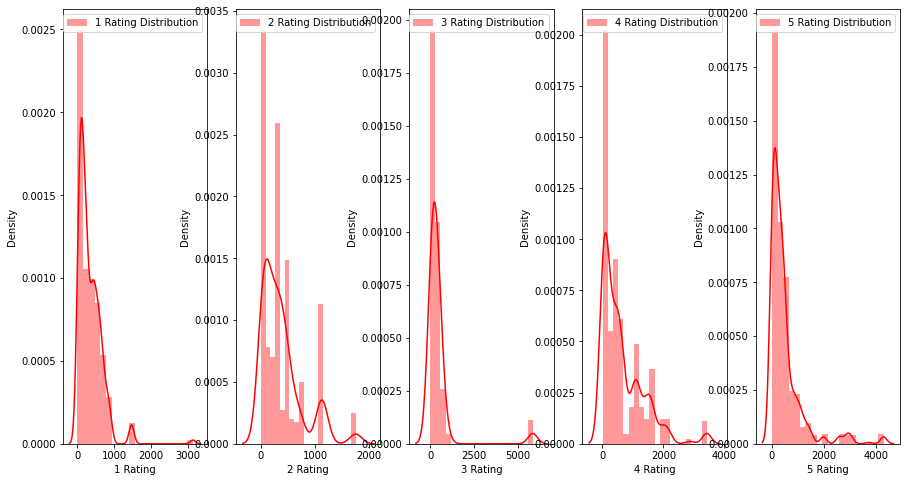

In [52]:
#Message distribution before cleaning

f,ax = plt.subplots(1,5,figsize =(15,8))

sns.distplot(df[df['Ratings']==1]['Length'],bins=20,ax=ax[0],label='1 Rating Distribution',color='r')

ax[0].set_xlabel("1 Rating")
ax[0].legend()

sns.distplot(df[df['Ratings']==2]['Length'],bins=20,ax=ax[1],label='2 Rating Distribution',color='r')

ax[1].set_xlabel("2 Rating")
ax[1].legend()

sns.distplot(df[df['Ratings']==3]['Length'],bins=20,ax=ax[2],label='3 Rating Distribution',color='r')

ax[2].set_xlabel("3 Rating")
ax[2].legend()


sns.distplot(df[df['Ratings']==4]['Length'],bins=20,ax=ax[3],label='4 Rating Distribution',color='r')

ax[3].set_xlabel("4 Rating")
ax[3].legend()

sns.distplot(df[df['Ratings']==5]['Length'],bins=20,ax=ax[4],label='5 Rating Distribution',color='r')

ax[4].set_xlabel("5 Rating")
ax[4].legend()


plt.show()

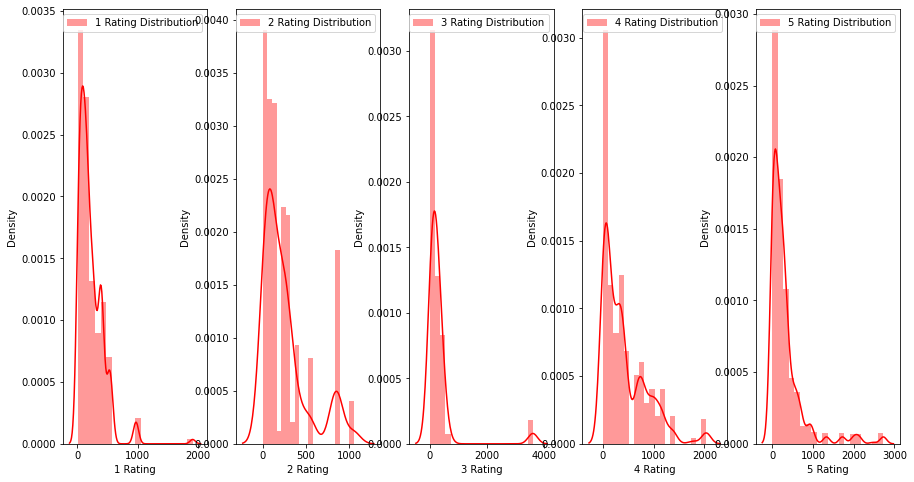

In [53]:
#Message distribution After cleaning

f,ax = plt.subplots(1,5,figsize =(15,8))

sns.distplot(df[df['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='1 Rating Distribution',color='r')

ax[0].set_xlabel("1 Rating")
ax[0].legend()

sns.distplot(df[df['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='2 Rating Distribution',color='r')

ax[1].set_xlabel("2 Rating")
ax[1].legend()

sns.distplot(df[df['Ratings']==3]['clean_length'],bins=20,ax=ax[2],label='3 Rating Distribution',color='r')

ax[2].set_xlabel("3 Rating")
ax[2].legend()


sns.distplot(df[df['Ratings']==4]['clean_length'],bins=20,ax=ax[3],label='4 Rating Distribution',color='r')

ax[3].set_xlabel("4 Rating")
ax[3].legend()

sns.distplot(df[df['Ratings']==5]['clean_length'],bins=20,ax=ax[4],label='5 Rating Distribution',color='r')

ax[4].set_xlabel("5 Rating")
ax[4].legend()


plt.show()

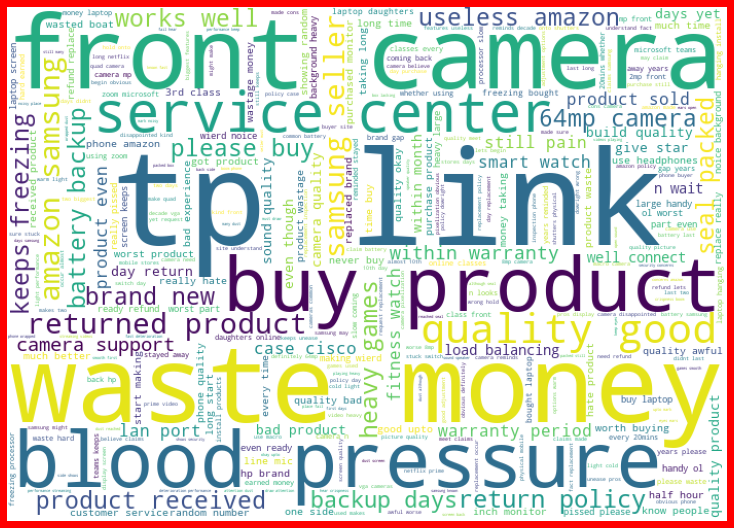

In [54]:
#Getting sense of loud words in Review of 1 rating

from wordcloud import WordCloud

Rating_1 = df['Product_Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,
                      height=500,
                      background_color='white',
                      max_words=300).generate(" ".join(Rating_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

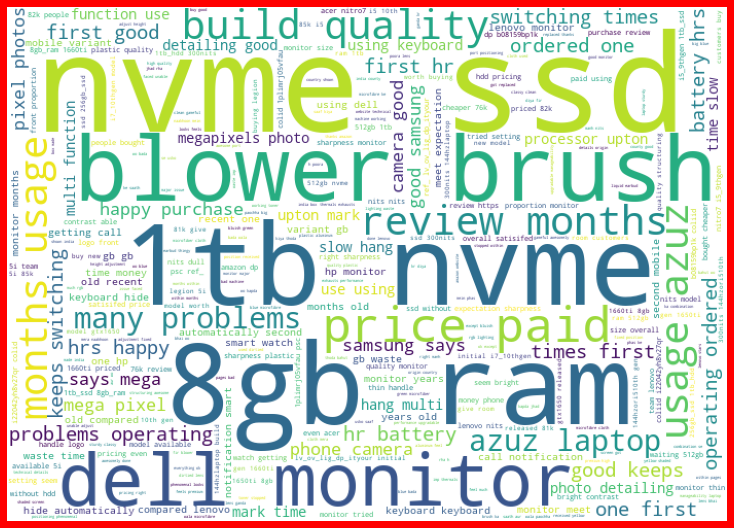

In [55]:
#Getting sense of loud words in Review of 2 rating

from wordcloud import WordCloud

Rating_1 = df['Product_Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,
                      height=500,
                      background_color='white',
                      max_words=300).generate(" ".join(Rating_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

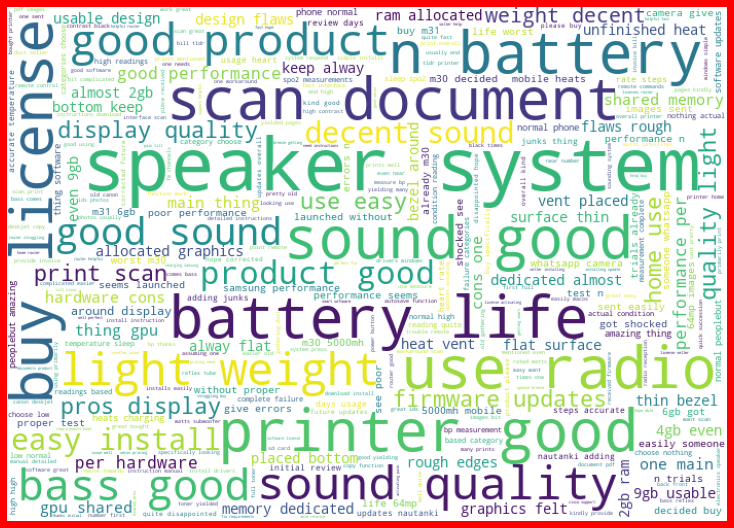

In [56]:
#Getting sense of loud words in Review of 3 rating

from wordcloud import WordCloud

Rating_1 = df['Product_Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,
                      height=500,
                      background_color='white',
                      max_words=300).generate(" ".join(Rating_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

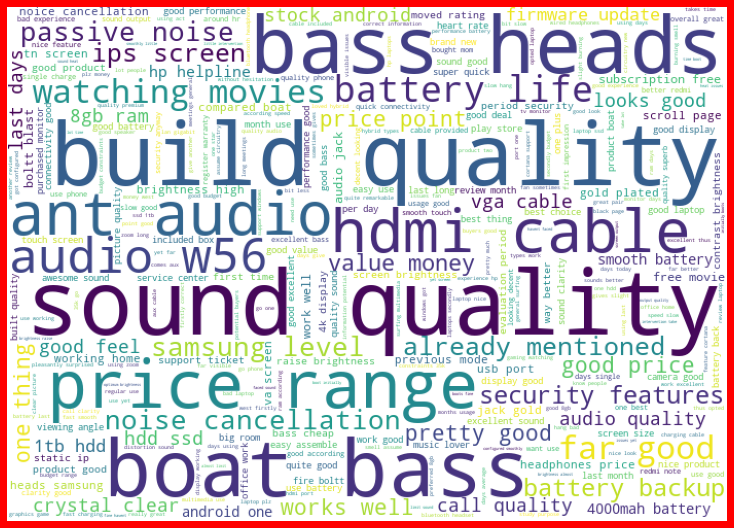

In [57]:
#Getting sense of loud words in Review of 4 rating

from wordcloud import WordCloud

Rating_1 = df['Product_Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,
                      height=500,
                      background_color='white',
                      max_words=300).generate(" ".join(Rating_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

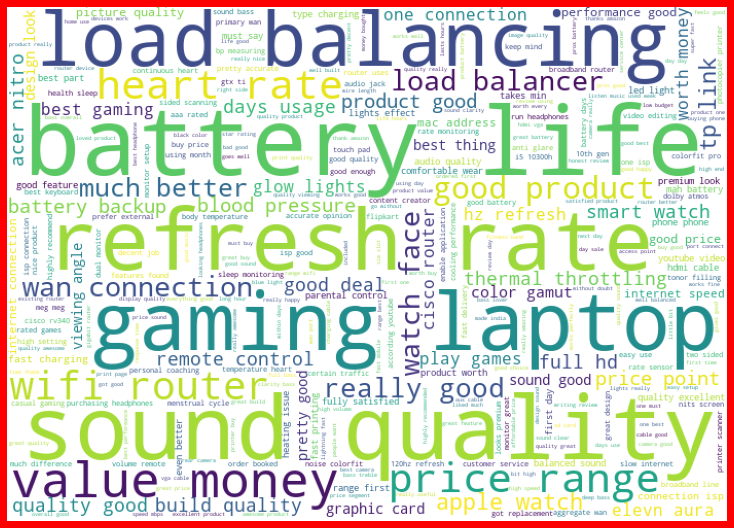

In [58]:
#Getting sense of loud words in Review of 5 rating

from wordcloud import WordCloud

Rating_1 = df['Product_Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,
                      height=500,
                      background_color='white',
                      max_words=300).generate(" ".join(Rating_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [65]:
# 1.convert text into vectors using TF-IDF
# 2.Instantiate MultinomialNB Classifier
# 3.Split feature and lable

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

tf_vec = TfidfVectorizer()



features = tf_vec.fit_transform(df['Product_Review'])

x = features

y = df['Ratings']

In [61]:
x.shape

(11254, 5995)

In [62]:
y.shape

(11254,)

In [67]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,52):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(x_train,y_train)
        pred=reg.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score at random state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("Maximum Accuracy Score", max_score, "is achieved at", final_r_state)
    return max_score

In [69]:
lr=LogisticRegression()
max_acc_score(lr,x,y)

Accuracy score at random state 42 is 0.8804975566414927
Accuracy score at random state 43 is 0.8791648156374945
Accuracy score at random state 44 is 0.8889382496668148
Accuracy score at random state 45 is 0.8818302976454909
Accuracy score at random state 46 is 0.8769435806308308
Accuracy score at random state 47 is 0.8782763216348289
Accuracy score at random state 48 is 0.8773878276321635
Accuracy score at random state 49 is 0.8764993336294981
Accuracy score at random state 50 is 0.8862727676588184
Accuracy score at random state 51 is 0.8840515326521546
Maximum Accuracy Score 0.8889382496668148 is achieved at 44


0.8889382496668148

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=52)

In [70]:
#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
#Initializing the instance of the model
lr=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [73]:
Rattings_Review= []
Rattings_Review.append(('Logistic Regression',lr))
Rattings_Review.append(('MultinomialNB',mnb))
Rattings_Review.append(('DecisionTreeClassifier',dtc))
Rattings_Review.append(('KNeighborsClassifier',knc))
Rattings_Review.append(('RandomForestClassifier',rfc))
Rattings_Review.append(('AdaBoostClassifier',abc))
Rattings_Review.append(('GradientBoostingClassifier',gbc))

In [76]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in Rattings_Review:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n\n\n')

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.8998384491114702


cross_val_score:  0.546111733056913


Classification report:
 
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       582
         2.0       1.00      0.83      0.91       105
         3.0       1.00      0.82      0.90       175
         4.0       0.96      0.73      0.83       522
         5.0       0.84      0.97      0.90      1092

    accuracy                           0.90      2476
   macro avg       0.95      0.86      0.90      2476
weighted avg       0.91      0.90      0.90      2476



Confusion matrix: 

[[ 554    0    0    0   28]
 [   1   87    0    0   17]
 [   0    0  143    0   32]
 [   8    0    0  383  131]
 [  16    0    0   15 1061]]




****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.8937802907915994


cross_va

In [77]:
#Final Output
Final=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs})
Final

,Model,Accuracy_score,Cross_val_score
0,Logistic Regression,89.983845,54.611173
1,MultinomialNB,89.378029,52.958543
2,DecisionTreeClassifier,87.802908,48.995891
3,KNeighborsClassifier,87.802908,48.978003
4,RandomForestClassifier,89.620355,55.899667
5,AdaBoostClassifier,72.253635,45.592047
6,GradientBoostingClassifier,89.458805,55.784222


Logistic Model seem to a good fit among all the other models

In [79]:
import pickle
filename='Rating_Pridication_Project3.pkl'
pickle.dump(lr,open(filename,'wb'))

In [82]:
a=np.array(y_test)
a

array([1., 4., 3., ..., 1., 5., 5.])

In [80]:
lr_prediction=lr.predict(x)

#Making a dataframe of predictions
rating_prediction=pd.DataFrame({'Predictions':lr_prediction})
rating_prediction

,Predictions
0,4.0
1,5.0
2,5.0
3,4.0
4,4.0
...,...
11249,5.0
11250,5.0
11251,5.0
11252,1.0


Lasso Regression